In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:/py/applemobility/applemobilitytrends-2021-07-15.csv')

In [3]:
display(df)

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14,2021-07-15
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,213.60,209.47,221.95,252.15,262.14,247.54,246.47,237.87,238.04,250.37
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,222.43,226.27,223.24,231.22,215.14,196.89,234.84,226.27,231.51,236.29
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,70.14,73.12,100.51,105.66,109.23,71.06,70.97,74.74,79.38,87.62
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,60.67,62.95,82.24,81.02,88.71,49.75,60.64,65.44,65.97,75.18
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,108.18,109.79,113.92,104.99,87.32,95.39,99.25,102.74,104.53,96.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,210.61,229.50,208.34,248.07,253.65,169.78,196.52,206.91,220.94,222.04
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,168.77,164.91,197.36,211.11,212.94,173.31,167.95,175.54,189.77,186.52
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,161.90,166.20,169.19,183.25,172.02,155.59,160.36,155.55,168.36,171.38
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,132.30,128.23,138.74,155.91,140.13,123.31,133.51,123.23,126.44,141.27


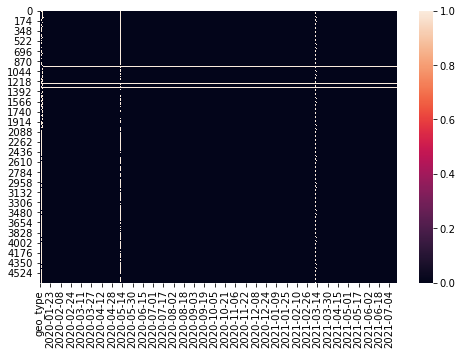

In [4]:
plt.subplots(figsize=(8,5))
sns.heatmap(df.isnull())
plt.show()

In [5]:
df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14,2021-07-15
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,213.60,209.47,221.95,252.15,262.14,247.54,246.47,237.87,238.04,250.37
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,222.43,226.27,223.24,231.22,215.14,196.89,234.84,226.27,231.51,236.29
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,70.14,73.12,100.51,105.66,109.23,71.06,70.97,74.74,79.38,87.62
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,60.67,62.95,82.24,81.02,88.71,49.75,60.64,65.44,65.97,75.18
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,108.18,109.79,113.92,104.99,87.32,95.39,99.25,102.74,104.53,96.91


In [6]:
#countries/regions and cities
geo_mask = df["geo_type"] == "country/region"
mobility_countries = df[geo_mask]
mobility_cities = df[~geo_mask]
print("There are a total of {} countires and {} cities with provided mobility data.".format(len(mobility_countries),
                                                                                           len(mobility_cities)))

There are a total of 153 countires and 4538 cities with provided mobility data.


In [7]:
def get_trans_count(a):
    name = a["geo_type"].iloc[0]
    return df["transportation_type"].value_counts().rename(str(name))

transport_types_count = pd.concat([get_trans_count(mobility_countries), get_trans_count(mobility_cities)], axis=1, sort=False)

display(transport_types_count)

,country/region,city
driving,3048,3048
walking,1092,1092
transit,551,551


In [8]:
#melting date columns into rows

id_vars = ["geo_type", "region","transportation_type","alternative_name","sub-region","country"]

melted_country = pd.melt(mobility_countries, id_vars= id_vars, var_name = "Date", value_name="Value")

melted_city = pd.melt(mobility_cities, id_vars= id_vars, var_name = "Date", value_name="Value")

melted_city.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,Date,Value
0,city,Aachen,driving,NaN,North Rhine-Westphalia,Germany,2020-01-13,100.0
1,city,Aachen,walking,NaN,North Rhine-Westphalia,Germany,2020-01-13,100.0
2,city,Adelaide,driving,NaN,South Australia,Australia,2020-01-13,100.0
3,city,Adelaide,transit,NaN,South Australia,Australia,2020-01-13,100.0
4,city,Adelaide,walking,NaN,South Australia,Australia,2020-01-13,100.0


In [9]:
import datetime

In [10]:
melted_city["Date"] = pd.to_datetime(melted_city["Date"])

# Mobility trends

### Change in routing requests since January 13, 2020


Here i will find the mobility trend in LONDON, which is a city of a country, since january 13, 2020.

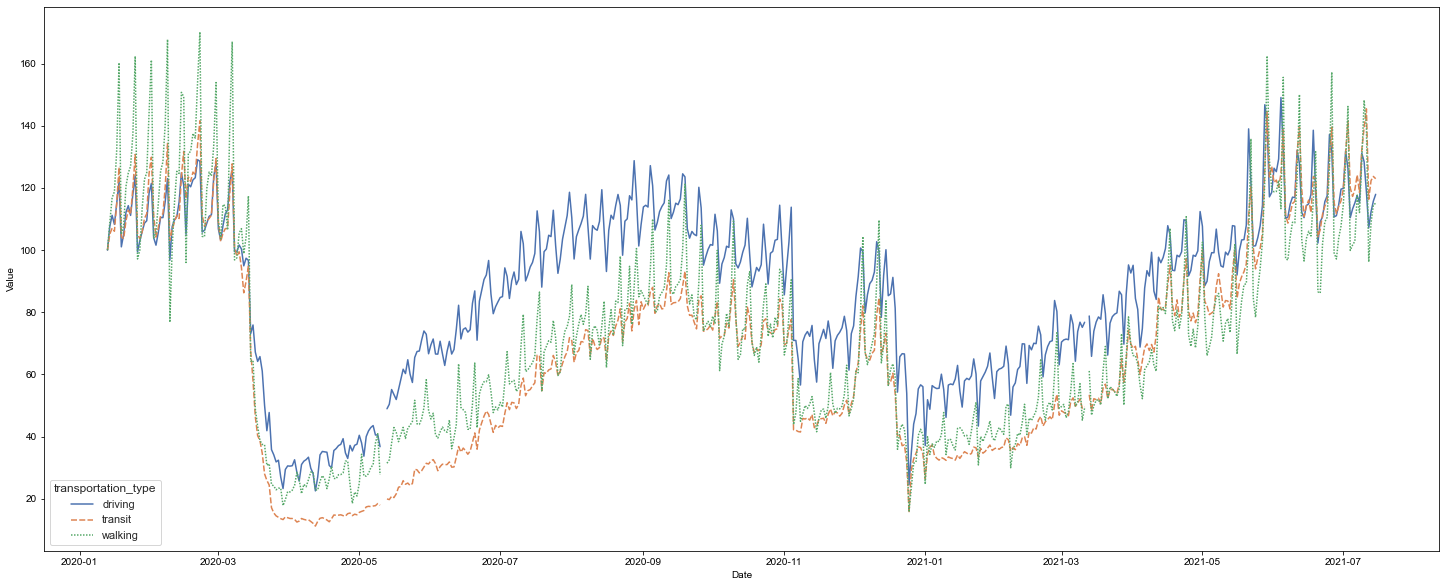

,Date,transportation_type,Value
388,2020-01-13,driving,100.00
389,2020-01-13,transit,100.00
390,2020-01-13,walking,100.00
4926,2020-01-14,driving,107.65
4927,2020-01-14,transit,105.14


In [11]:
fig, ax = plt.subplots(figsize=(25,10))
df2 = melted_city[melted_city["region"]=="London"]

sns.set_theme(style="whitegrid")

sns.lineplot(x="Date", y="Value",
             hue="transportation_type",
             style="transportation_type",
             data=df2)

plt.show()

display(df2[["Date","transportation_type","Value"]].head())

### Country wise trend in mobility.

Here i will find the mobility trend in AUSTRALIA since january 13, 2020 till now.

In [12]:
melted_country["Date"] = pd.to_datetime(melted_country["Date"])

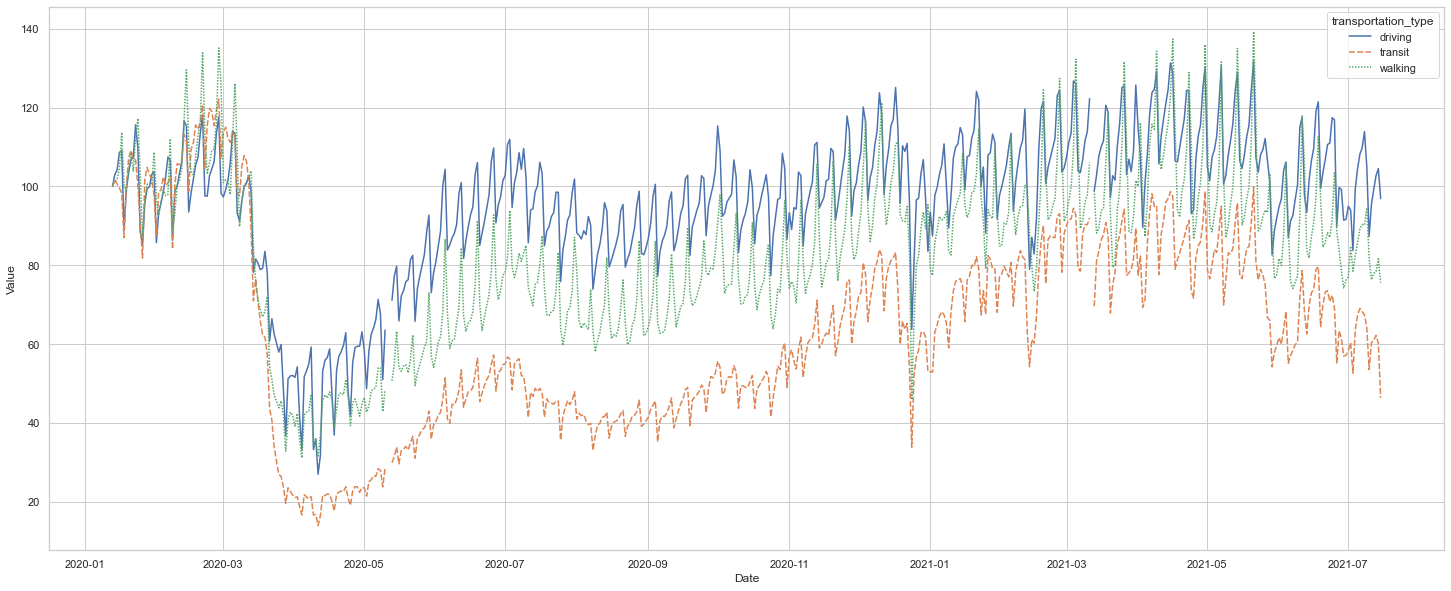

,Date,transportation_type,Value
4,2020-01-13,driving,100.00
5,2020-01-13,transit,100.00
6,2020-01-13,walking,100.00
157,2020-01-14,driving,102.98
158,2020-01-14,transit,101.78


In [13]:
fig, ax = plt.subplots(figsize=(25,10))
df3 = melted_country[melted_country["region"]=="Australia"]

sns.set_theme(style="whitegrid")

sns.lineplot(x="Date", y="Value",
             hue="transportation_type",
             style="transportation_type",
             data=df3)

plt.show()
display(df3[["Date","transportation_type","Value"]].head())

# Conclusions

As we can see in both graphs, the trend in mobility of Apple maps go through a deep dip on march 2020. The lockdown was in affect on that very month onward in almost every country, so it was common for people to use less maps during that time.

Around 1 month after first lockdown, people started going out again. As we can see in these graphs mobility trend start increasing. So we can assume people were started going out for work and start using maps again from that day.

After first lockdown there is not much affect on trend of mobility. So we can say the First wave of covid affected the users and mobility of maps for users but after that mobility have a positive trend with time.